<a href="https://colab.research.google.com/github/VivanBhatt/QuantumAlg_HW/blob/main/PHSX801_HW7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
pip install pennylane --upgrade

In [7]:
import pennylane as qml
import numpy as np
#import matplotlib.pyplot as plt

**Changing Perspectives**

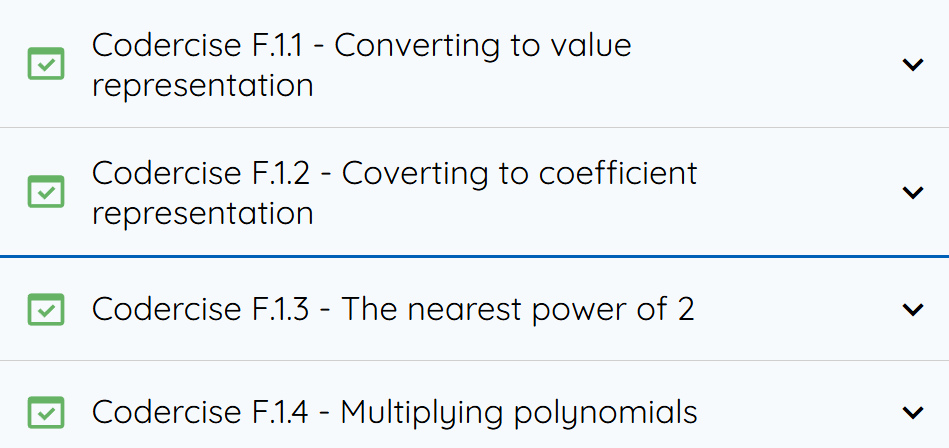

**Q1**

In [8]:
def coefficients_to_values(coefficients):
    """Returns the value representation of a polynomial

    Args:
        coefficients (array[complex]): a 1-D array of complex
            coefficients of a polynomial with
            index i representing the i-th degree coefficient

    Returns:
        array[complex]: the value representation of the
            polynomial
    """
    ##################
    # YOUR CODE HERE #
    ##################
    return np.fft.fft(coefficients)

A = [4, 3, 2, 1]
print(coefficients_to_values(A))

[10.+0.j  2.-2.j  2.+0.j  2.+2.j]


**Q2**

In [9]:
def values_to_coefficients(values):
    """Returns the coefficient representation of a polynomial

    Args:
        values (array[complex]): a 1-D complex array with
            the value representation of a polynomial

    Returns:
        array[complex]: a 1-D complex array of coefficients
    """

    ##################
    # YOUR CODE HERE #
    ##################
    return np.fft.ifft(values)


A = [10.+0.j,  2.-2.j,  2.+0.j,  2.+2.j]
print(values_to_coefficients(A))

[4.+0.j 3.+0.j 2.+0.j 1.+0.j]


**Q3**

In [10]:
def nearest_power_of_2(x):
    """Given an integer, return the nearest power of 2.

    Args:
        x (int): a positive integer

    Returns:
        int: the nearest power of 2 of x
    """
    ##################
    # YOUR CODE HERE #
    ##################

    return 1 if x==0 else 2**int(np.ceil(np.log2(x)))

**Q4**

In [11]:
def fft_multiplication(poly_a, poly_b):
    """Returns the result of multiplying two polynomials

    Args:
        poly_a (array[complex]): 1-D array of coefficients
        poly_b (array[complex]): 1-D array of coefficients

    Returns:
        array[complex]: complex coefficients of the product
            of the polynomials
    """
    ##################
    # YOUR CODE HERE #
    ##################

    # Calculate the number of values required
    n_values=len(poly_a)+len(poly_b)-1

    # Figure out the nearest power of 2
    n=nearest_power_of_2(n_values)

    # Pad zeros to the polynomial
    poly_a_padded = np.pad(poly_a, (0, n - len(poly_a)))
    poly_b_padded = np.pad(poly_b, (0, n - len(poly_b)))

    # Convert the polynomials to value representation
    values_a=coefficients_to_values(poly_a_padded)
    values_b=coefficients_to_values(poly_b_padded)

    # Multiply
    values=values_a*values_b

    # Convert back to coefficient representation

    return values_to_coefficients(values)

**Quantum Fourier Transform**

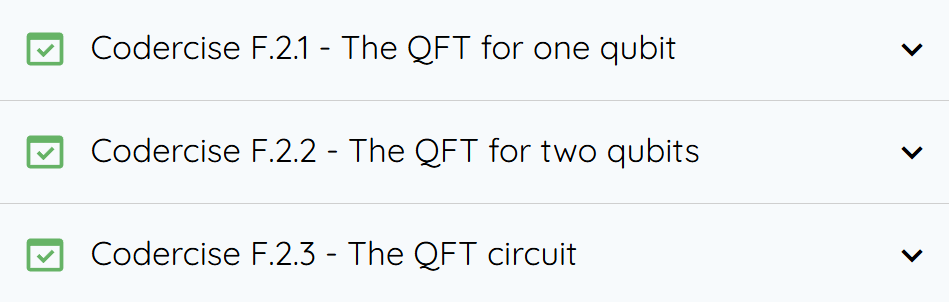

**Q1**

In [12]:
num_wires = 1
dev = qml.device("default.qubit", wires=num_wires)

@qml.qnode(dev)
def one_qubit_QFT(basis_id):
    """A circuit that computes the QFT on a single qubit.

    Args:
        basis_id (int): An integer value identifying
            the basis state to construct.

    Returns:
        array[complex]: The state of the qubit after applying QFT.
    """
    # Prepare the basis state |basis_id>
    bits = [int(x) for x in np.binary_repr(basis_id, width=num_wires)]
    qml.BasisState(bits, wires=[0])

    ##################
    # YOUR CODE HERE #
    ##################
    qml.Hadamard(0)
    return qml.state()

**Q2**

In [13]:
num_wires = 2
dev = qml.device("default.qubit", wires=num_wires)

@qml.qnode(dev)
def two_qubit_QFT(basis_id):
    """A circuit that computes the QFT on two qubits using qml.QubitUnitary.

    Args:
        basis_id (int): An integer value identifying the basis state to construct.

    Returns:
        array[complex]: The state of the qubits after the QFT operation.
    """

    # Prepare the basis state |basis_id>
    bits = [int(x) for x in np.binary_repr(basis_id, width=num_wires)]
    qml.BasisState(bits, wires=[0, 1])

    ##################
    # YOUR CODE HERE #
    ##################

    U=0.5*np.array([[1,1,1,1],[1,1j,-1,-1j],[1,-1,1,-1],[1,-1j,-1,1j]])
    qml.QubitUnitary(U,wires=[0,1])

    return qml.state()

**Q3**

In [14]:
num_wires = 2
dev = qml.device("default.qubit", wires=num_wires)

@qml.qnode(dev)
def decompose_two_qubit_QFT(basis_id):
    """A circuit that computes the QFT on two qubits using elementary gates.

    Args:
        basis_id (int): An integer value identifying the basis state to construct.

    Returns:
        array[complex]: The state of the qubits after the QFT operation.
    """
    # Prepare the basis state |basis_id>
    bits = [int(x) for x in np.binary_repr(basis_id, width=num_wires)]
    qml.BasisState(bits, wires=[0, 1])

    ##################
    # YOUR CODE HERE #
    ##################
    qml.Hadamard(0)
    #qml.ctrl(qml.S,control=1)(wires=0)
    qml.CPhase(np.pi / 2, [1,0])
    qml.Hadamard(1)
    qml.SWAP([0,1])

    return qml.state()

**Connecting the Dots**

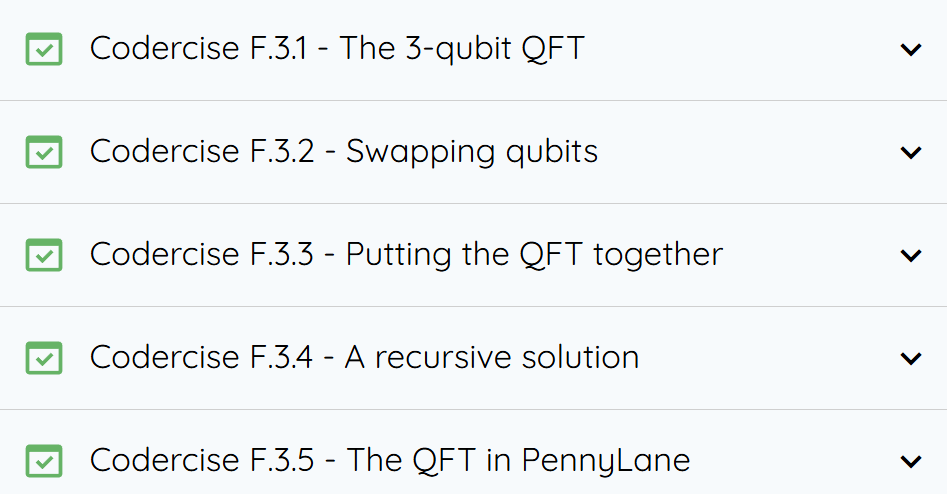

**Q1**

In [15]:
num_wires = 3
dev = qml.device("default.qubit", wires=num_wires)

@qml.qnode(dev)
def three_qubit_QFT(basis_id):
    """A circuit that computes the QFT on three qubits.

    Args:
        basis_id (int): An integer value identifying the basis state to construct.

    Returns:
        array[complex]: The state of the qubits after the QFT operation.
    """
    # Prepare the basis state |basis_id>
    bits = [int(x) for x in np.binary_repr(basis_id, width=num_wires)]
    qml.BasisState(bits, wires=[0, 1, 2])

    ##################
    # YOUR CODE HERE #
    ##################
    qml.Hadamard(0)
    qml.CPhase(np.pi/2,[1,0])
    qml.CPhase(np.pi/4,[2,0])
    qml.Hadamard(1)
    qml.CPhase(np.pi/2,[2,1])
    qml.Hadamard(2)
    qml.SWAP([0,2])

    return qml.state()

**Q2**

In [16]:
dev = qml.device('default.qubit', wires=4)


def swap_bits(n_qubits):
    """A circuit that reverses the order of qubits, i.e.,
    performs a SWAP such that [q1, q2, ..., qn] -> [qn, ... q2, q1].

    Args:
        n_qubits (int): An integer value identifying the number of qubits.
    """
    ##################
    # YOUR CODE HERE #
    ##################
    for i in range(int(np.floor(n_qubits/2))):
       qml.SWAP([i,n_qubits-i-1])

    pass

@qml.qnode(dev)
def qft_node(basis_id, n_qubits):
    # Prepare the basis state |basis_id>
    bits = [int(x) for x in np.binary_repr(basis_id, width=n_qubits)]
    qml.BasisState(bits, wires=range(n_qubits))
    # qft_rotations(n_qubits)
    swap_bits(n_qubits)
    return qml.state()

**Q3**

In [17]:
dev = qml.device('default.qubit', wires=4)

def qft_rotations(n_qubits):
    """A circuit performs the QFT rotations on the specified qubits.

    Args:
        n_qubits (int): An integer value identifying the number of qubits.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    for i in range(n_qubits):
        qml.Hadamard(i)
        for j in range(i+1, n_qubits):
            qml.CPhase(np.pi/(2**(j-i)),[j,i])
    pass

@qml.qnode(dev)
def qft_node(basis_id, n_qubits):
    # Prepare the basis state |basis_id>
    bits = [int(x) for x in np.binary_repr(basis_id, width=n_qubits)]
    qml.BasisState(bits, wires=range(n_qubits))
    qft_rotations(n_qubits)
    swap_bits(n_qubits)
    return qml.state()

**Q4**

In [18]:
dev = qml.device('default.qubit', wires=4)

def qft_recursive_rotations(n_qubits, wire=0):
    """A circuit that performs the QFT rotations on the specified qubits
        recursively.

    Args:
        n_qubits (int): An integer value identifying the number of qubits.
        wire (int): An integer identifying the wire
                    (or the qubit) to apply rotations on.
    """

    ##################
    # YOUR CODE HERE #
    ##################
    if wire >= n_qubits:
        return
    qml.Hadamard(wire)
    for j in range(wire+1, n_qubits):
        qml.CPhase(np.pi/(2**(j-wire)),[j,wire])
    qft_recursive_rotations(n_qubits, wire+1)


@qml.qnode(dev)
def qft_node(basis_id, n_qubits):
    # Prepare the basis state |basis_id>
    bits = [int(x) for x in np.binary_repr(basis_id, width=n_qubits)]
    qml.BasisState(bits, wires=range(n_qubits))
    qft_recursive_rotations(n_qubits)
    swap_bits(n_qubits)
    return qml.state()

**Q5**

In [19]:
dev = qml.device('default.qubit', wires=4)

@qml.qnode(dev)
def pennylane_qft(basis_id, n_qubits):
    """A that circuit performs the QFT using PennyLane's QFT template.

    Args:
        basis_id (int): An integer value identifying
            the basis state to construct.
        n_qubits (int): An integer identifying the
            number of qubits.

    Returns:
        array[complex]: The state after applying the QFT to the qubits.
    """
    # Prepare the basis state |basis_id>
    bits = [int(x) for x in np.binary_repr(basis_id, width=n_qubits)]
    qml.BasisState(bits, wires=range(n_qubits))

    ##################
    # YOUR CODE HERE #
    ##################
    qml.QFT(range(n_qubits))
    return qml.state()